In [30]:
from PIL import Image
import numpy as np

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def show_image(image):
#     img=Image.open(image_path)
    plt.figure("name")
    plt.figure(num=1, figsize=(8,5),)
    plt.title('name title')
    plt.axis('off') # 不显示坐标轴
    plt.imshow(image)
    plt.show()
    
def show_image_file(file_path):
    image = Image.open(file_path)
    show_image(image)

In [33]:
from struct import unpack, pack

In [34]:
class bmpParser:
    def __init__(self):
        self.palette = []
        self.raw_data = None
        self.biWidth = 0
        self.biHeight = 0
        self.biBitCount = 0
        self.biClrUsed = 0
        self.biSize = 40
        self.biXPelsPerMeter = 0
        self.biYPelsPerMeter = 0
        self.biClrImportant = 0
        self.palette_bytes = None
    
    def new(self,mode,size,color):
        
        if mode == 'P16':
            self.pa_size = 16*4
            self.biBitCount = 4
            self.biClrUsed = 16
            self.biClrImportant = 16
            for i in range(16):
                self.palette.append((0,0,0))
        elif mode == 'P256':
            self.pa_size = 256*4
            self.biBitCount = 8
            self.biClrUsed = 256
            self.biClrImportant = 256
            for i in range(256):
                self.palette.append((0,0,0))
            
        self.bfOffBits = 54 + self.pa_size
        
        self.biWidth, self.biHeight = size
        self.biSizeImage = int(self.biWidth * self.biHeight * self.biBitCount / 8)
                
        self.bfSize = self.biSizeImage + 54 + self.pa_size
        
        if color == 'red':
            palette = (255,0,0)
        elif color == 'blue':
            palette = (0,0,255)
        elif color == 'green':
            palette = (0,255,0)
            
        self.palette[0] = palette
            
        self.raw_data = bytearray(self.biSizeImage) 
        self.palette_bytes = bytearray(self.biClrUsed * 3)
            
#         return self
    
    def open(self,file_path):
        file = open(file_path,'rb')
        id = unpack('cc',file.read(2))
        print(id)
        self.bfSize = unpack("<i", file.read(4))[0]       # 位图文件大小
        bfReserved1 = unpack("<h", file.read(2))[0]  # 保留字段 必须设为 0 
        bfReserved2 = unpack("<h", file.read(2))[0]  # 保留字段 必须设为 0 
        self.bfOffBits = unpack("<i", file.read(4))[0]    # 偏移量 从文件头到位图数据需偏移多少字节（位图信息头、调色板长度等不是固定的，这时就需要这个参数了）
        # 读取 bmp 文件的位图信息头 40 字节
        self.biSize = unpack("<i", file.read(4))[0]       # 所需要的字节数
        self.biWidth = unpack("<i", file.read(4))[0]      # 图像的宽度 单位 像素
        self.biHeight = unpack("<i", file.read(4))[0]     # 图像的高度 单位 像素
        biPlanes = unpack("<h", file.read(2))[0]     # 说明颜色平面数 总设为 1
        self.biBitCount = unpack("<h", file.read(2))[0]   # 说明比特数

        biCompression = unpack("<i", file.read(4))[0]  # 图像压缩的数据类型
        self.biSizeImage = unpack("<i", file.read(4))[0]    # 图像大小
        self.biXPelsPerMeter = unpack("<i", file.read(4))[0]# 水平分辨率
        self.biYPelsPerMeter = unpack("<i", file.read(4))[0]# 垂直分辨率
        self.biClrUsed = unpack("<i", file.read(4))[0]      # 实际使用的彩色表中的颜色索引数
        self.biClrImportant = unpack("<i", file.read(4))[0] # 对图像显示有重要影响的颜色索引的数目
#         print('bit cnt %d'%biBitCount)
#         print('color = %d'%biClrUsed)

        file.seek(54)
#         palette = []
        for i in range(self.biClrUsed):
                r,g,b = unpack('BBB',file.read(3))
                self.palette.append((r,g,b))

#         print(palette)        

        file.seek(self.bfOffBits)
        self.raw_data = file.read(self.biSizeImage)
#         print(len(raw_data))
        file.close()
        return self

    
    def save(self,filePath):
        out_file = open(filePath,'wb')
        out_file.write(pack('cc',b'B',b'M'))
        out_file.write(pack('i',self.bfSize))
        out_file.write(pack('i',0))
        out_file.write(pack('i',self.bfOffBits))
        out_file.write(pack('iii',self.biSize,self.biWidth,self.biHeight))
        out_file.write(pack('hh',1,self.biBitCount))
        out_file.write(pack('i',0))
        out_file.write(pack('iii',self.biSizeImage,self.biXPelsPerMeter,self.biYPelsPerMeter))
        out_file.write(pack('ii',self.biClrUsed,self.biClrImportant))

#         for color in self.palette:
#             print(bytes(color))
#             out_file.write(bytes(color))
        out_file.write(self.palette_bytes)

        out_file.seek(self.bfOffBits)  
        out_file.write(self.raw_data)
        out_file.close()

    def getPalette(self):
        return self.palette
    
    def getRawData(self):
        return self.raw_data
    
    def setPalette(self,pa):
        self.palette_bytes = pa
#         print(self.palette_bytes)
    
    def setRawData(self,rawdata):
        self.raw_data = rawdata
    
    def getWidth(self):
        return self.biWidth
    
    def getHeight(self):
        return self.biHeight


In [35]:
# bmp.save('o.bmp')
my_bmp = bmpParser()
my_bmp.new('P16',(96,96),'green')


In [36]:
import pickle

In [37]:
with open('palette.pickle','rb') as f:
    pa_read = pickle.load(f)
    print(pa_read)
    my_bmp.setPalette(pa_read)

b'\xff\x00\xff\x00GGG\x00QQQ\x00\xa7z\x86\x00\xb8\\\x00\x00\xff\x00\x00\x00\x00\xff\xff\x00\x00\x00\xff\x00\xff\xff\xff\x00\x00\x88\x00\x00333\x00[[[\x00\xb8\\\x00\x00\x1e\x1e\x1e\x00\x15\x15\x15\x00\x00\x00\x00\x00'


In [38]:
with open('bmp_raw.pickle','rb') as f:
    raw_data = pickle.load(f)
    raw_bytearray = bytearray()
    for line in raw_data:
        raw_bytearray.extend(line)
    my_bmp.setRawData(raw_bytearray)    

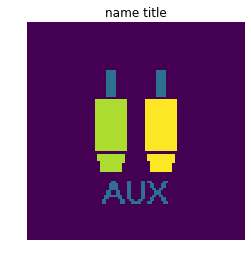

In [41]:
show_image_file('new_bmp.bmp')